In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Cleaning**

## **Start**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/midterm_hotel_data.csv')
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342.0,2015,July,27,1,NaN,0,...,Transient,0.0,0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,1,Resort Hotel,0,737.0,2015,July,27,1,0.0,0,...,Transient,0.0,0,0.0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,2,Resort Hotel,0,7.0,2015,July,27,1,NaN,1,...,Transient,75.0,0,NaN,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1,...,Transient,NaN,0,NaN,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,NaN,2015,July,27,1,0.0,2,...,Transient,98.0,0,NaN,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       83573 non-null   float64
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         83573 non-null   float64
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          83573 non-null   float64
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
print('df shape', df.shape)
df.describe()

df shape (119390, 37)


,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,83573.000000,119390.000000,119390.000000,119390.000000,83573.000000,119390.000000,83573.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,83573.000000,119390.000000,83573.000000
mean,59694.500000,0.370416,104.114965,2016.156554,27.165173,15.798241,0.924366,2.500302,1.855934,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.985427,0.062518,0.572553
std,34465.068657,0.482918,106.917703,0.707476,13.605138,8.780829,0.995809,1.908286,0.602225,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,48.140440,0.245291,0.792058
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.670000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,0.000000
75%,89541.750000,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


In [ ]:
#check null values
df.isnull().sum()

,0
Unnamed: 0,0
hotel,0
is_canceled,0
lead_time,35817
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,35817
stays_in_week_nights,0


## **Missing Values**

### **Remove outliers**

Text(0.5, 1.0, 'Box Plot of Lead Time')

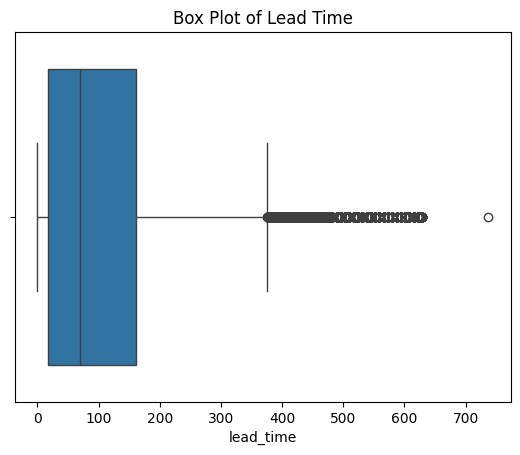

In [ ]:
#Lead Time Boxplot

sns.boxplot(data=df, x='lead_time')
plt.title(f'Box Plot of Lead Time')

Text(0.5, 1.0, 'Box Plot of ADR')

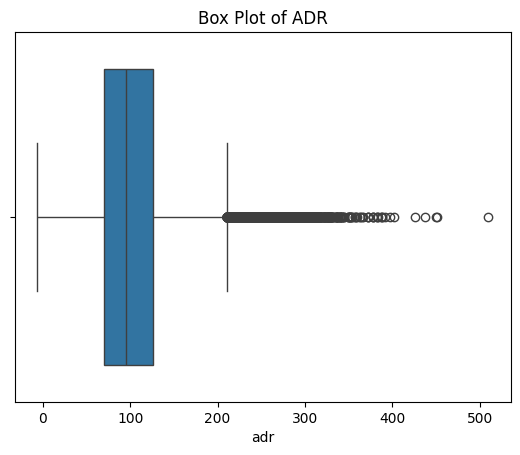

In [ ]:
#ADR Boxplot

sns.boxplot(data=df, x='adr')
plt.title(f'Box Plot of ADR')

In [ ]:
#IQR
#Calculate the upper and lower limits of lead time
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_bound_lt = np.where(df['lead_time'] >= upper)[0]
lower_bound_lt = np.where(df['lead_time'] <= lower)[0]

#Calculate the upper and lower limits of adr
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_bound_adr = np.where(df['adr'] >= upper)[0]
lower_bound_adr = np.where(df['adr'] <= lower)[0]

#Remove outliers
df = df.drop(index=upper_bound_lt)
df = df.drop(index=lower_bound_lt)
df = df.drop(index=upper_bound_adr)
df = df.drop(index=lower_bound_adr)

#Print new shape of df
print("New Shape: ", df.shape)
df.head()

New Shape:  (114576, 37)


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,0,Resort Hotel,0,342.0,2015,July,27,1,NaN,0,...,Transient,0.0,0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
2,2,Resort Hotel,0,7.0,2015,July,27,1,NaN,1,...,Transient,75.0,0,NaN,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1,...,Transient,NaN,0,NaN,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,4,Resort Hotel,0,NaN,2015,July,27,1,0.0,2,...,Transient,98.0,0,NaN,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,5,Resort Hotel,0,14.0,2015,July,27,1,0.0,2,...,Transient,NaN,0,1.0,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263


Text(0.5, 1.0, 'Box Plot of Lead Time after outlier removal')

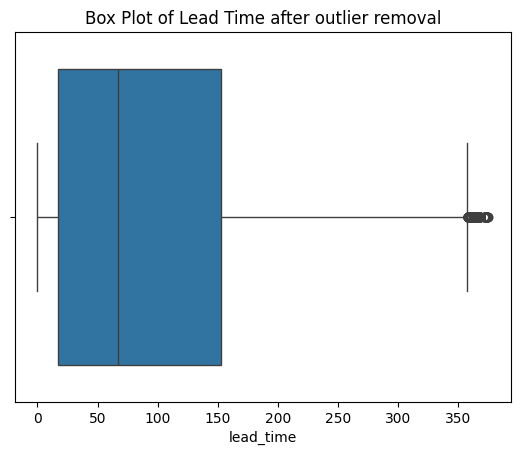

In [ ]:
#Boxplot of Lead Time after outlier removal

sns.boxplot(data=df, x='lead_time')
plt.title(f'Box Plot of Lead Time after outlier removal')

Text(0.5, 1.0, 'Box Plot of ADR after outlier removal')

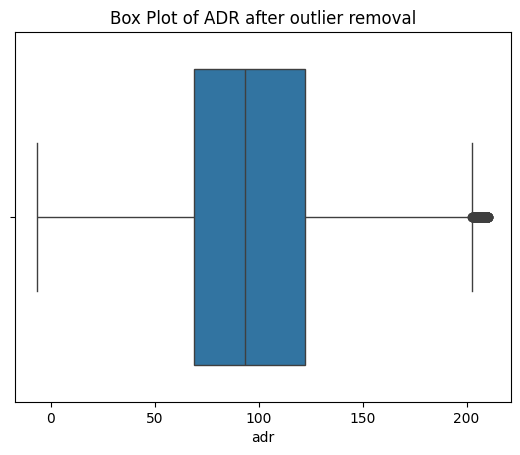

In [ ]:
#Boxplot of ADR after outlier removal

sns.boxplot(data=df, x='adr')
plt.title(f'Box Plot of ADR after outlier removal')

### **Check distribution shape**

Text(0.5, 1.0, 'Box Plot of Total of Special Requests')

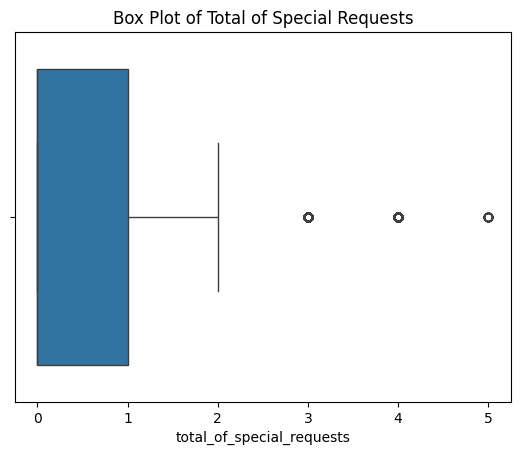

In [ ]:
#Boxplot of Total of Special Requests
sns.boxplot(data=df, x='total_of_special_requests')
plt.title(f'Box Plot of Total of Special Requests')

Text(0.5, 1.0, 'Box Plot of Stays in Weekend Nights')

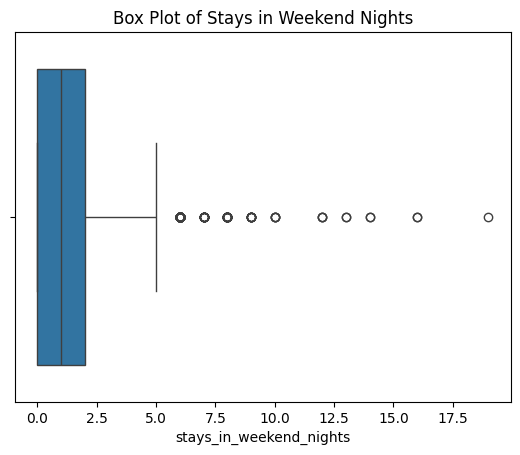

In [ ]:
#Boxplot of Stays in Weekend Nights

sns.boxplot(data=df, x='stays_in_weekend_nights')
plt.title(f'Box Plot of Stays in Weekend Nights')

### **Replace Missing Values**

In [ ]:
#Replace missing values
df['adults'] = df['adults'].fillna(1)
df['children'] = df['children'].fillna(round(df['children'].median()))
df['lead_time'] = df['lead_time'].fillna(round(df['lead_time'].median()))
df['adr'] = df['adr'].fillna(df['adr'].mean())
df['total_of_special_requests'] = df['total_of_special_requests'].fillna(round(df['total_of_special_requests'].median()))
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].fillna(round(df['stays_in_weekend_nights'].median()))
df = df.dropna(subset=['country'])
df = df.drop(columns=['Unnamed: 0','agent', 'company'])

#Print new shape
print('New Shape: ', df.shape)
df.isnull().sum()

New Shape:  (114093, 34)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## **Check Inconsistencies**

Check data inconsistencies for columns that will be processed

<Axes: xlabel='hotel'>

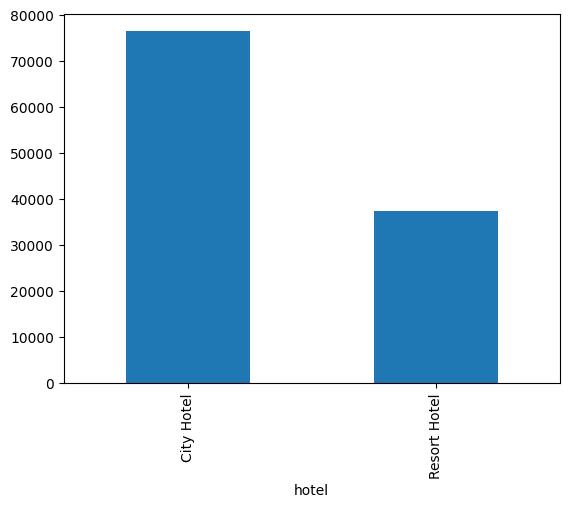

In [ ]:
df.hotel.value_counts().sort_index().plot(kind='bar', title='')

<Axes: xlabel='is_canceled'>

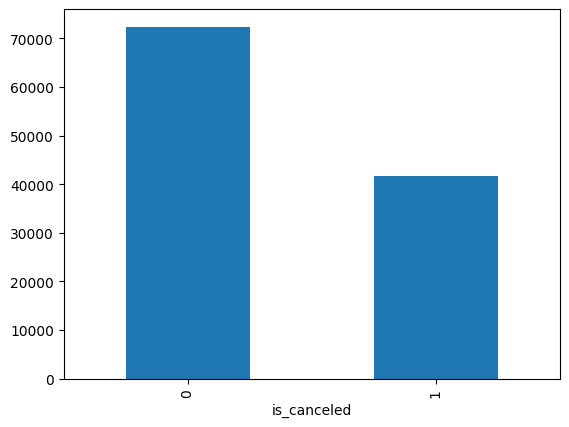

In [ ]:
df.is_canceled.value_counts().sort_index().plot(kind='bar', title='')

<Axes: xlabel='arrival_date_year'>

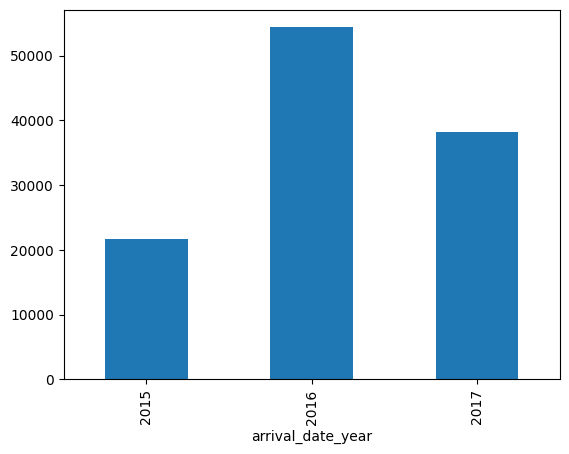

In [ ]:
df.arrival_date_year.value_counts().sort_index().plot(kind='bar', title='')

<Axes: xlabel='total_of_special_requests'>

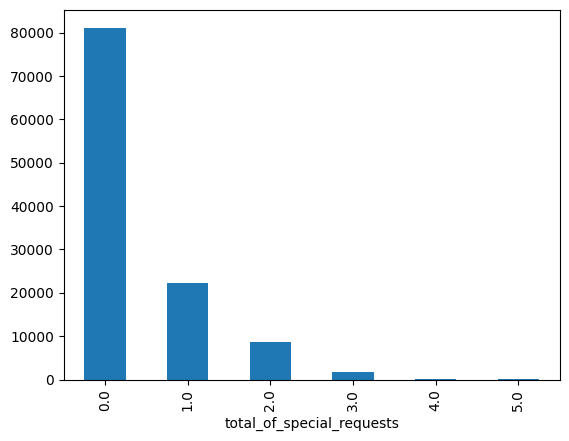

In [ ]:
df.total_of_special_requests.value_counts().sort_index().plot(kind='bar', title='')

<Axes: xlabel='reservation_status'>

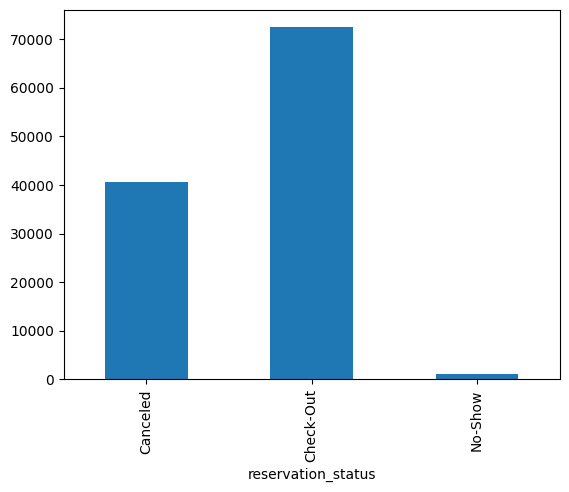

In [ ]:
df.reservation_status.value_counts().sort_index().plot(kind='bar', title='')

In [ ]:
unique_values_country = df['country'].unique()
print("Unique values in 'column_name':", unique_values_country)

Unique values in 'column_name': ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'UKR' 'SMR'
 'LVA' 'PRI' 'SRB' 'IND' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT' 'NGA'
 'MDV' 'VEN' 'SVK' 'FJI' 'PAK' 'LBN' 'PHL' 'SYC' 'GEO' 'AZE' 'BHR' 'NZL'
 'KAZ' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR' 'BIH' 'MUS'
 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU' 'VNM' 'PLW'
 'QAT' 'EGY' 'MLT' 'MWI' 'ECU' 'MDG' 'IDN' 'ISL' 'UZB' 'NPL' 'BHS' 'MAC'
 'TGO' 'TWN' 'DJI' 'STP' 'SEN' 'PER' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP' 'GLP'
 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'
 'NAM' 'BOL' 'PRY' '

## **Duplicates**

In [ ]:
df_cleaned = df.drop_duplicates()

#Print new shape
print("New Shape: ", df_cleaned.shape)

New Shape:  (114093, 34)


## **Save as CSV**

In [ ]:
df_cleaned.to_csv('midterm_hotel_data_cleaned.csv',index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/midterm_hotel_data_cleaned.csv')
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000,114093.000000
mean,0.365526,87.211687,2016.144996,27.000806,15.771432,2.499084,1.594585,0.090689,0.007809,0.033017,0.089655,0.136529,0.219356,2.138054,97.635178,0.060889,0.400095
std,0.481580,78.628336,0.708953,13.714384,8.781238,1.908641,0.639482,0.368141,0.096844,0.178682,0.862755,1.514871,0.651463,15.319030,33.855840,0.242440,0.710708
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,36.000000,2016.000000,16.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,0.000000,67.000000,2016.000000,27.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.528241,0.000000,0.000000
75%,1.000000,109.000000,2017.000000,38.000000,23.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.000000,0.000000,1.000000
max,1.000000,375.000000,2017.000000,53.000000,31.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,210.430000,8.000000,5.000000


# **Visualization**

## **No 4.1**

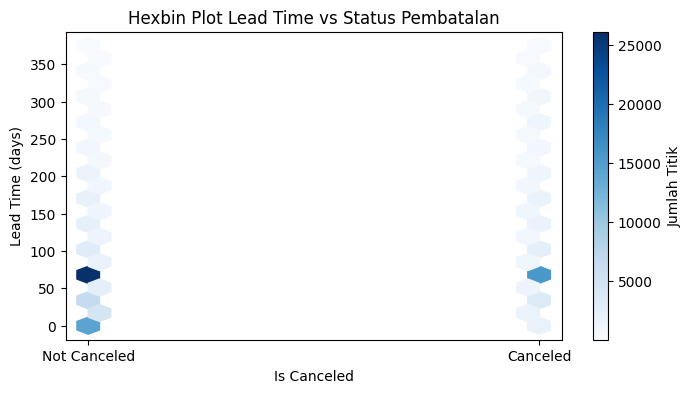

Correlation between lead time and total canceled bookings: -0.11591782449600739


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Add jitter to 'is_canceled' for clearer hexplot
df['is_canceled_jitter'] = df['is_canceled'] + np.random.normal(0, 0.02, size=len(df))

# Hexplot between lead_time and is_canceled
plt.figure(figsize=(8, 4))
plt.hexbin(df['is_canceled'], df['lead_time'], gridsize=20, cmap='Blues', mincnt=1)
plt.colorbar(label='Jumlah Titik')
plt.title('Hexbin Plot Lead Time vs Status Pembatalan')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

# Menghitung korelasi antara lead_time dan is_canceled=1
df_canceled = df[df['is_canceled'] == 1]
canceled_by_lt = df_canceled.groupby('lead_time').size().reset_index(name='cancellation_count')
correlation = canceled_by_lt['lead_time'].corr(canceled_by_lt['cancellation_count'])
print("Correlation between lead time and total canceled bookings:", correlation)

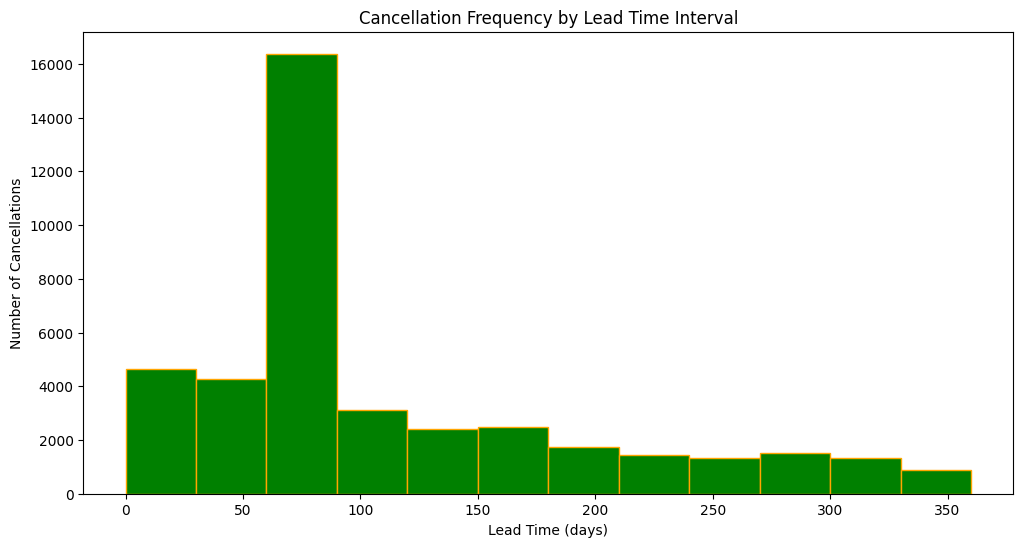

,lead_time,cancellation_count
0,0.0,267
1,1.0,224
2,2.0,150
3,3.0,138
4,4.0,119
...,...,...
95,95.0,110
96,96.0,86
97,97.0,115
98,98.0,107


In [ ]:
# Filter for canceled bookings
df_canceled = df[df['is_canceled'] == 1]

# Group by lead_time and count cancellations
cancellation_frequency = df_canceled.groupby('lead_time').size().reset_index(name='cancellation_count')
cancellation_frequency.head(100)

# Define lead time bins with a max lead time of 375 (based on describe function)
bins = range(0, 386, 30)

# Plot histogram of lead time for canceled bookings
plt.figure(figsize=(12, 6))
plt.hist(df_canceled['lead_time'], bins=bins, edgecolor='orange',color='green')
plt.title('Cancellation Frequency by Lead Time Interval')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Cancellations')
plt.show()

cancellation_frequency.head(100)

## **No 4.2**

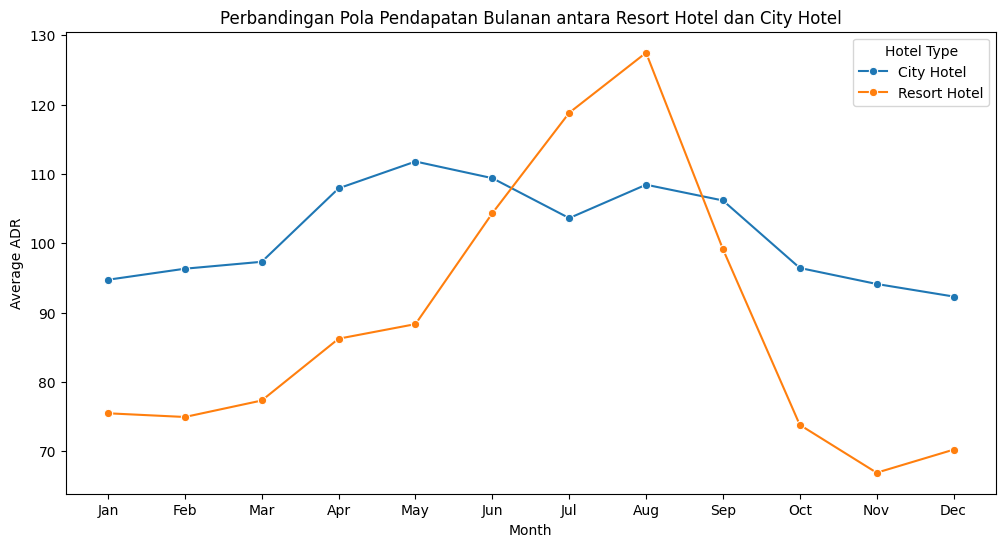

In [ ]:
# Difference of monthly revenue pattern between Resort Hotel and City Hotel
# Add column month from reservation_status_date to aggregate adr based on months
df['month'] = pd.to_datetime(df['reservation_status_date']).dt.month
monthly_adr = df.groupby(['hotel', 'month'])['adr'].mean().reset_index()

# Plot average monthly ADR for Resort Hotel and City Hotel
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='adr', hue='hotel', data=monthly_adr, marker='o')
plt.title('Perbandingan Pola Pendapatan Bulanan antara Resort Hotel dan City Hotel')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.legend(title='Hotel Type')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## **No 4.3**

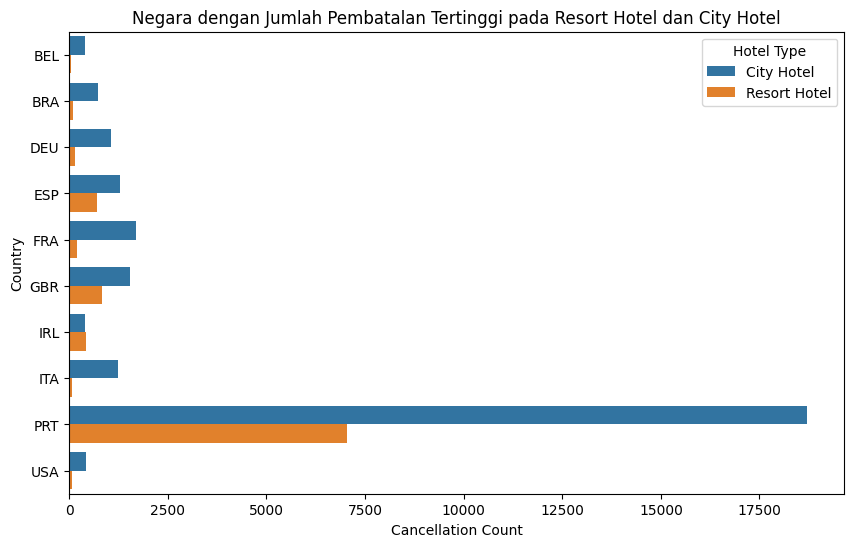

In [ ]:
# Countries with most canceled reservation in Resort Hotel and City Hotel
# Filter to only canceled reservations
canceled_data = df[df['is_canceled'] == 1]

# Grouped cancellations based on hotel and country
cancellation_by_country = canceled_data.groupby(['country', 'hotel']).size().reset_index(name='cancel_count')

# Filter to just top 10 countries with highest cancelations
top_countries = cancellation_by_country.groupby('country')['cancel_count'].sum().nlargest(10).index
top_cancellation_data = cancellation_by_country[cancellation_by_country['country'].isin(top_countries)]

# Plot cancelations count for top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='cancel_count', y='country', hue='hotel', data=top_cancellation_data, dodge=True)
plt.title('Negara dengan Jumlah Pembatalan Tertinggi pada Resort Hotel dan City Hotel')
plt.xlabel('Cancellation Count')
plt.ylabel('Country')
plt.legend(title='Hotel Type')
plt.show()

## **No 4.4**

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/midterm_hotel_data_cleaned.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342.0,2015,July,27,1,0,2.0,0.0,...,Transient,0.000000,0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,7.0,2015,July,27,1,1,1.0,0.0,...,Transient,75.000000,0,0.0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
2,Resort Hotel,0,13.0,2015,July,27,1,1,1.0,0.0,...,Transient,97.528241,0,0.0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
3,Resort Hotel,0,67.0,2015,July,27,1,2,1.0,0.0,...,Transient,98.000000,0,0.0,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
4,Resort Hotel,0,14.0,2015,July,27,1,2,1.0,0.0,...,Transient,97.528241,0,1.0,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263


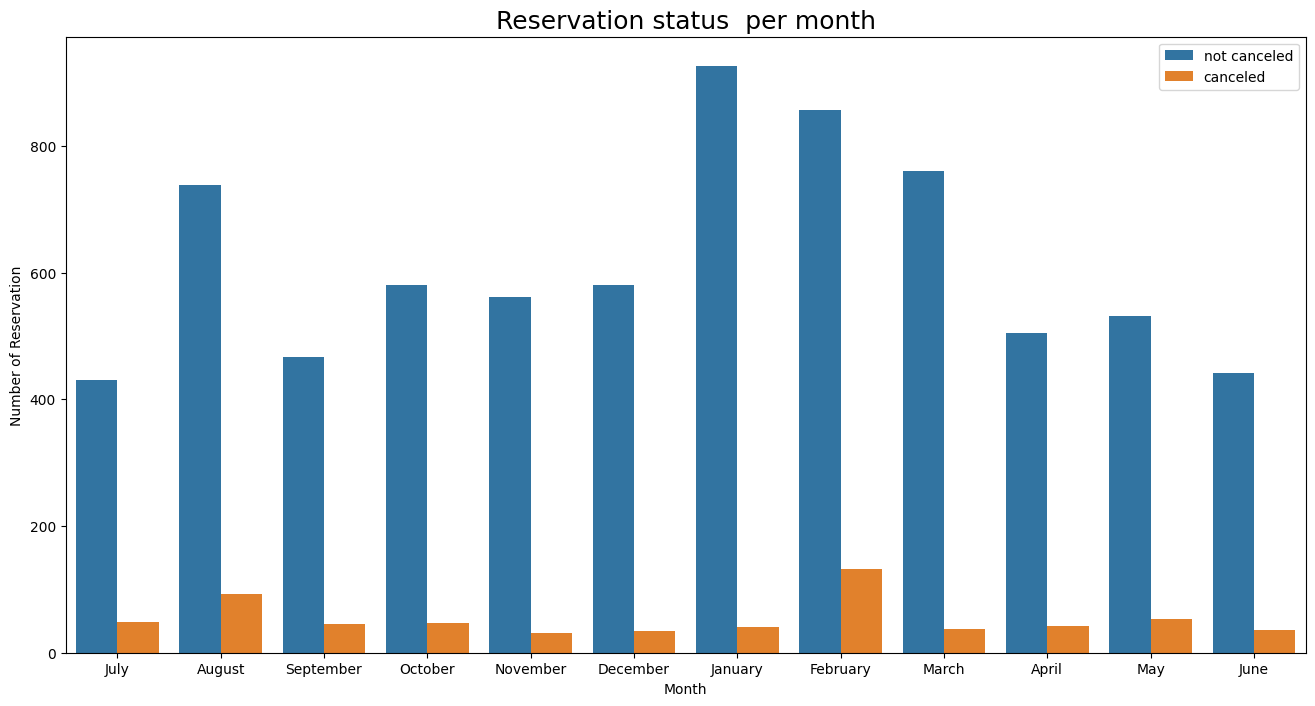

In [ ]:
#last minute bookings per month
df_last_minute = df[df['lead_time'] <= 2]

plt.figure(figsize =(16,8))
ax = sns.countplot(x ='arrival_date_month',hue = 'is_canceled',data=df_last_minute)
plt.title('Reservation status  per month', size = 18)
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.legend(["not canceled","canceled"])
plt.show()

Total Last Minute Bookings: 8017
Total Non-Last Minute Bookings: 106076


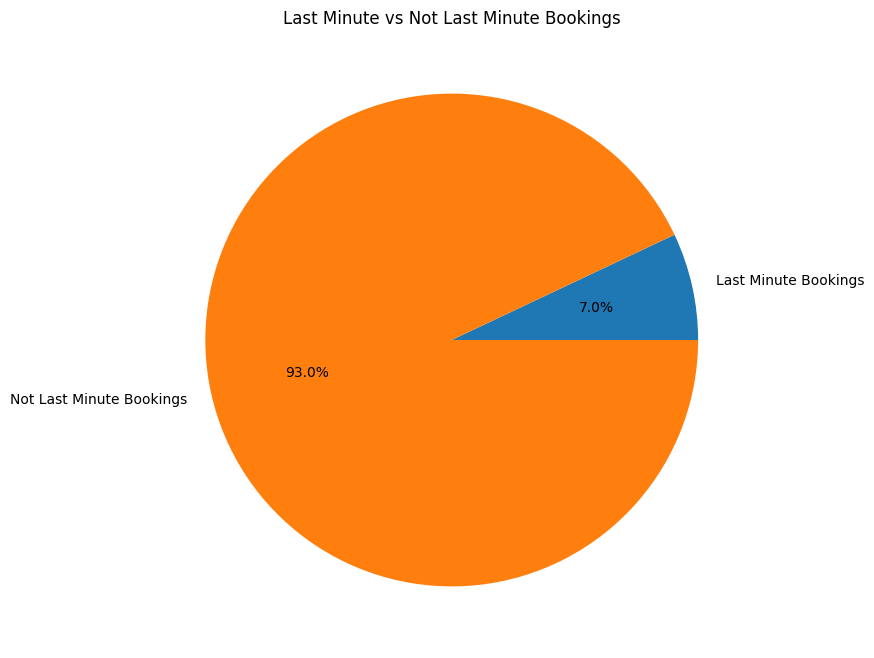

In [ ]:
#Last minute booking vs non last minute booking
#Total value of last minute bookings
total_last_minute = len(df_last_minute)

# Total value of non-last minute bookings
non_last_minute_bookings = df[df['lead_time'] > 2]
total_non_last_minute = len(non_last_minute_bookings)

print('Total Last Minute Bookings:', total_last_minute)
print('Total Non-Last Minute Bookings:', total_non_last_minute)

# Create pie chart
data = [total_last_minute, total_non_last_minute]
labels = ['Last Minute Bookings', 'Not Last Minute Bookings']

plt.figure(figsize=(8, 8))
plt.title('Last Minute vs Not Last Minute Bookings')
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

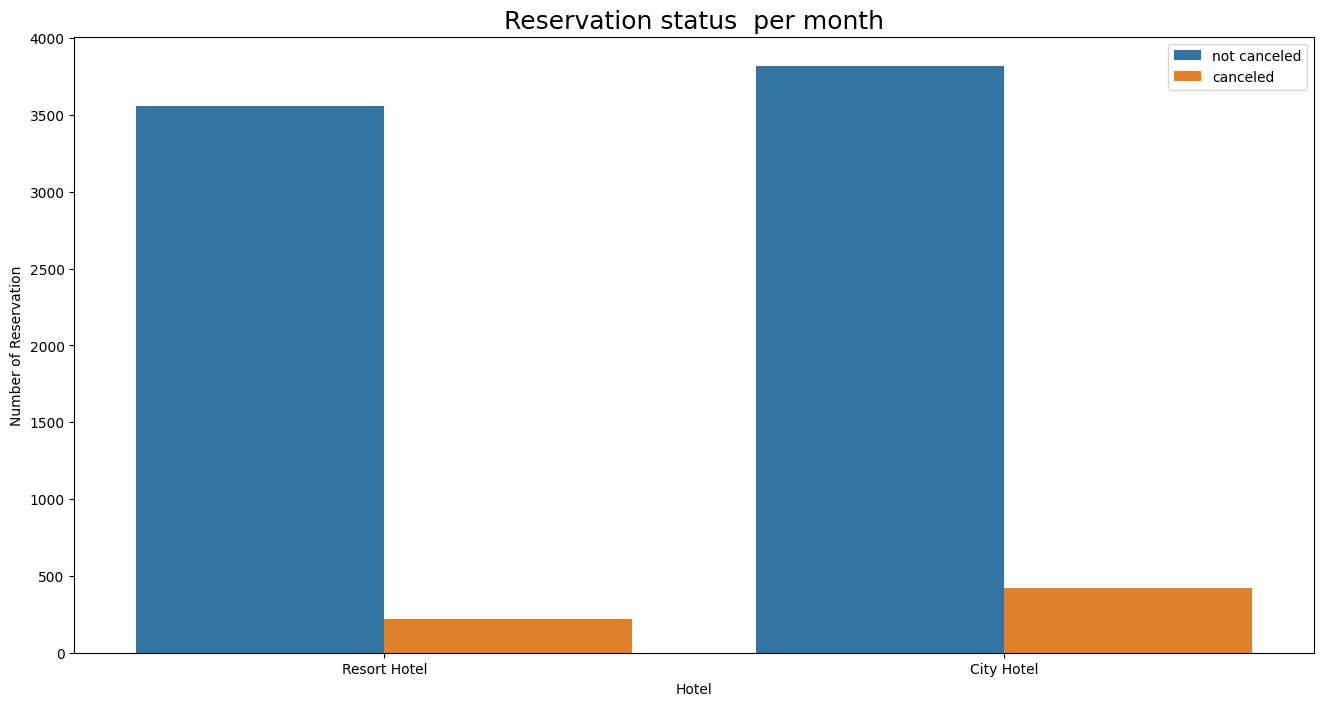

In [ ]:
#last minute booking based on hotels
df_last_minute = df[df['lead_time'] <= 2]

plt.figure(figsize =(16,8))
ax = sns.countplot(x ='hotel',hue = 'is_canceled',data=df_last_minute)
plt.title('Reservation status  per month', size = 18)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservation')
plt.legend(['not canceled','canceled'])
plt.show()

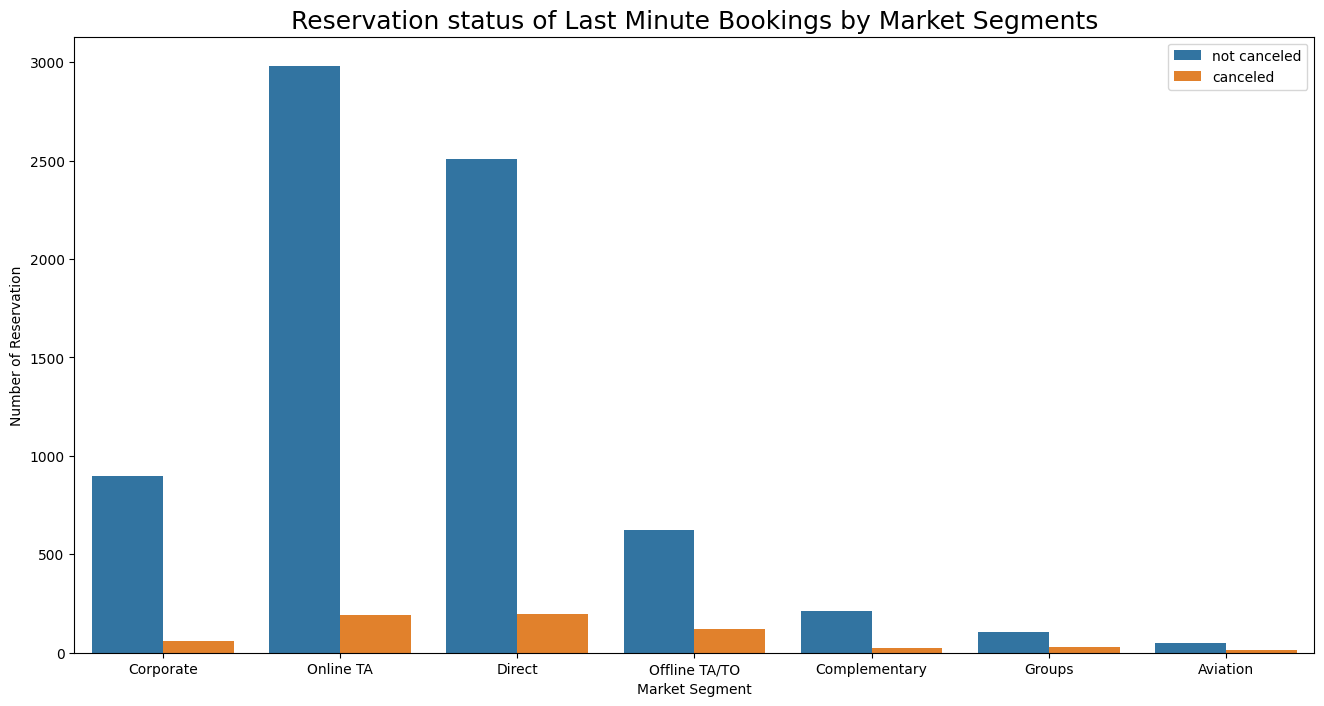

In [ ]:
#last minute booking based on market
df_last_minute = df_last_minute[df_last_minute['market_segment'] != 'Undefined']

plt.figure(figsize =(16,8))
ax = sns.countplot(x ='market_segment',hue = 'is_canceled',data=df_last_minute)
plt.title('Reservation status of Last Minute Bookings by Market Segments', size = 18)
plt.xlabel('Market Segment')
plt.ylabel('Number of Reservation')
plt.legend(['not canceled','canceled'])
plt.show()

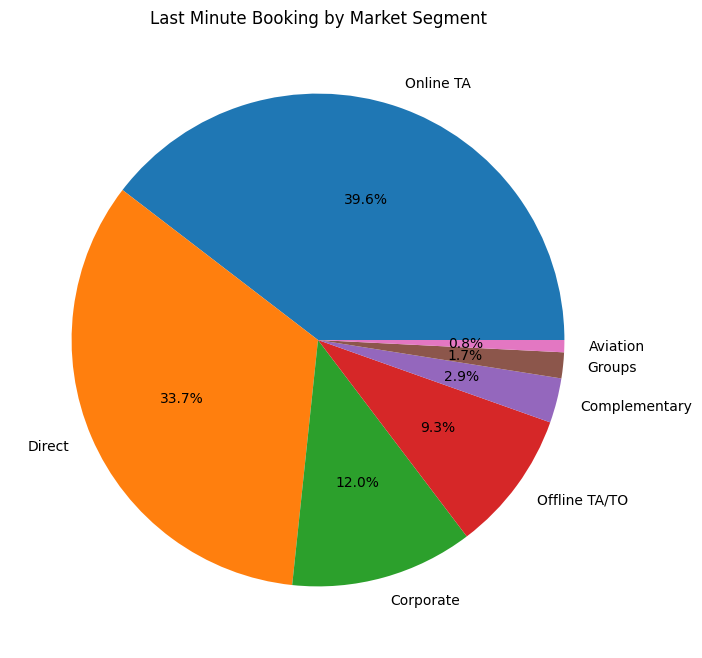

In [ ]:
#last minute booking by market segment
df_market_segment = df_last_minute['market_segment'].value_counts(normalize=True)

plt.figure(figsize=(8,8))
plt.title('Last Minute Booking by Market Segment')
plt.pie(df_market_segment, labels=df_market_segment.index, autopct='%1.1f%%')
plt.show()

Total Last Minute Bookings with Mismatched Room Types: 1839
       arrival_date_month reserved_room_type assigned_room_type  is_canceled
17                   July                  A                  G            0
88                   July                  A                  C            0
131                  July                  A                  C            0
166                  July                  E                  H            0
218                  July                  A                  F            0
...                   ...                ...                ...          ...
112847             August                  A                  C            0
112917             August                  A                  K            0
112927             August                  D                  A            0
113321             August                  A                  C            0
113977             August                  A                  D            0

[1839 rows x 4 

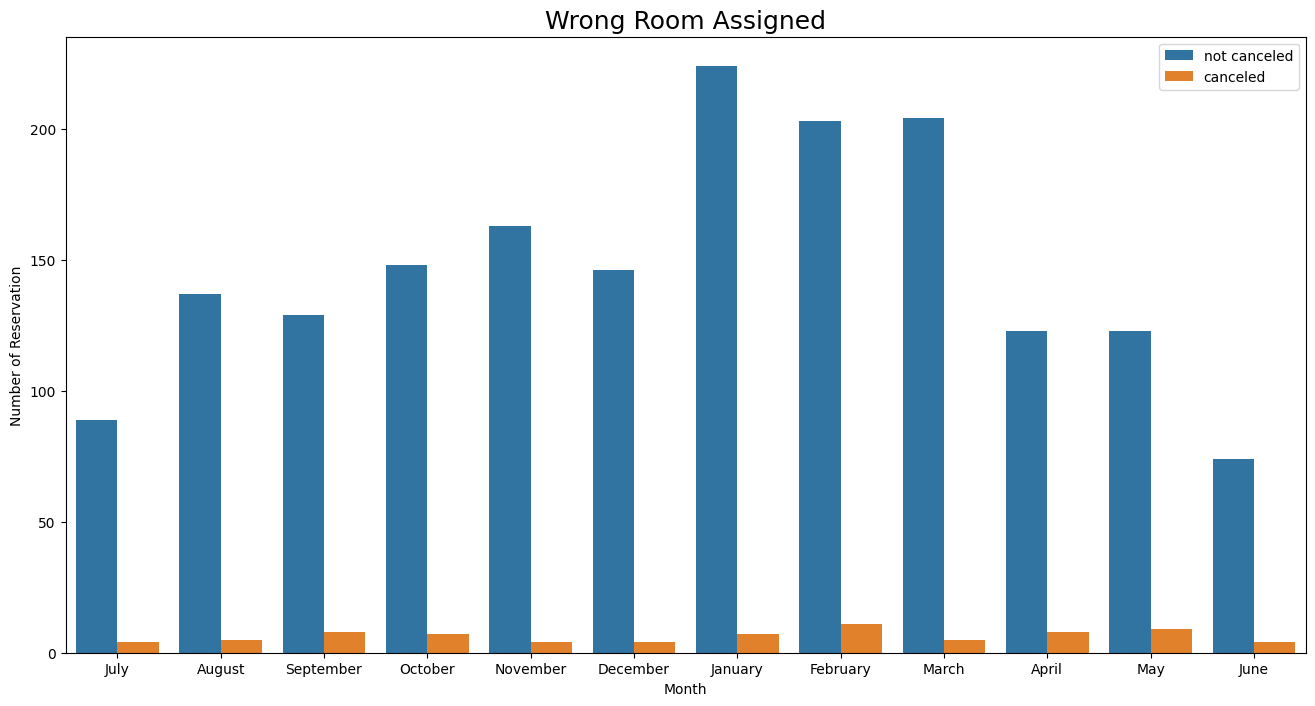

In [ ]:
#Wrong room assigned on last minute booking
wrong_rooms_last_minute = df[(df['lead_time'] <= 1) & (df['reserved_room_type'] != df['assigned_room_type'])]

# Display the results
print(f"Total Last Minute Bookings with Mismatched Room Types: {len(wrong_rooms_last_minute)}")
print(wrong_rooms_last_minute[['arrival_date_month', 'reserved_room_type', 'assigned_room_type', 'is_canceled']])

plt.figure(figsize =(16,8))
ax = sns.countplot(x ='arrival_date_month',hue = 'is_canceled',data=wrong_rooms_last_minute)
plt.title('Wrong Room Assigned', size = 18)
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.legend(['not canceled','canceled'])
plt.show()

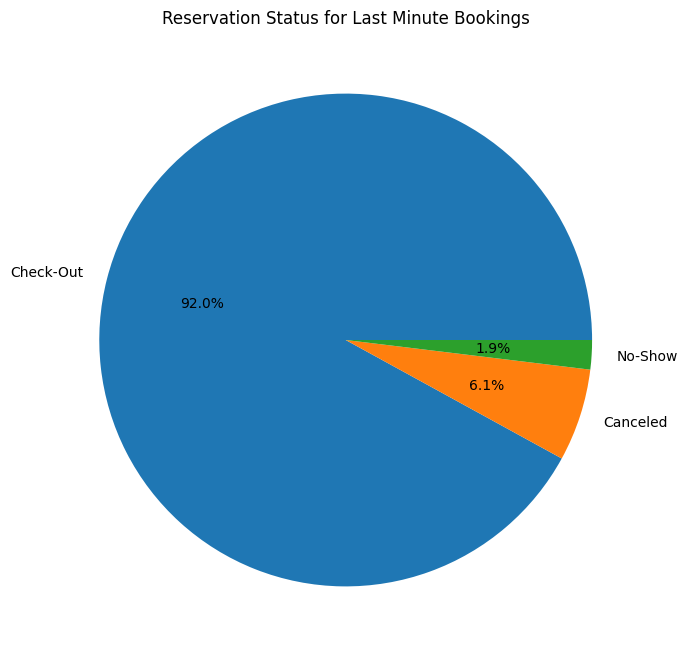

In [ ]:
reservation_status_percentage = df_last_minute['reservation_status'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.title('Reservation Status for Last Minute Bookings')
plt.pie(reservation_status_percentage, labels=reservation_status_percentage.index, autopct='%1.1f%%')
plt.show()

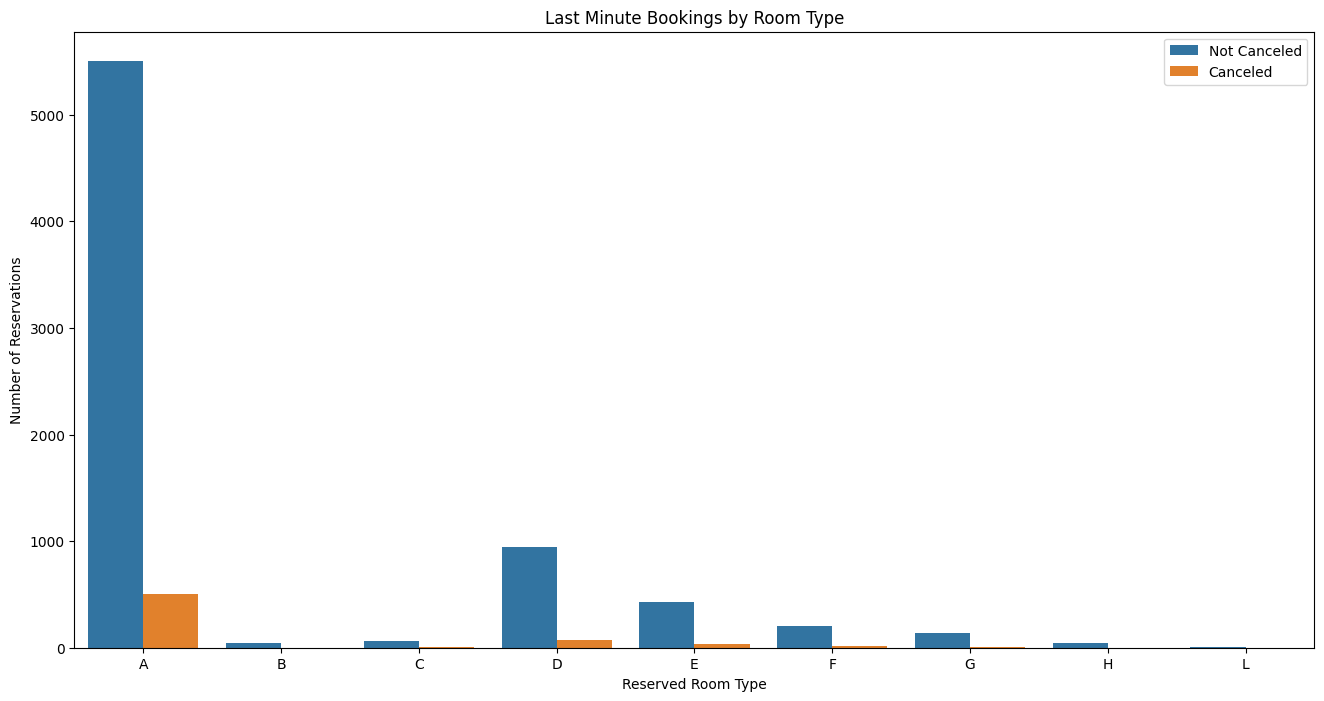

In [ ]:
bookings_by_room_type = df_last_minute.groupby(['reserved_room_type', 'is_canceled']).size().reset_index(name='number of bookings')

plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x='reserved_room_type', y='number of bookings', hue='is_canceled', data=bookings_by_room_type)
plt.title('Last Minute Bookings by Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Reservations')
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles, ['Not Canceled', 'Canceled'])
plt.show()

## **No 5**

In [ ]:
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/midterm_hotel_data_cleaned.csv')

city_hotel_adr = df[df['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = df[df['hotel'] == 'Resort Hotel']['adr']
variance_ratio = np.var(city_hotel_adr)/np.var(resort_hotel_adr)

# Print the variance of both data groups
print(np.var(city_hotel_adr), np.var(resort_hotel_adr), variance_ratio)


877.6892587289382 1585.8880318712593 0.5534370908224295


In [ ]:
alpha = 0.05
t_stat, p_value = stats.ttest_ind(a=city_hotel_adr, b=resort_hotel_adr, equal_var=True)
print(f'T-Statistic: {t_stat:.3f}')
print(f'P-Value: {p_value:.3f}')

T-Statistic: 60.387
P-Value: 0.000


In [ ]:
alpha = 0.05
t_stat, p_value = stats.ttest_ind(a=city_hotel_adr, b=resort_hotel_adr, equal_var=True)
print(f'T-Statistic: {t_stat:.3f}')
print(f'P-Value: {p_value:.3f}')

if p_value < alpha:
    print('hasil: Tolak H0. Terdapat perbedaan signifikan pada average ADR antara City Hotel dan Resort Hotel')
else:
    print("Hasil: terima H0. Tidak terdapat perbedaan signifikan pada average ADR antara City Hotel dan Resort Hotel.")

T-Statistic: 60.387
P-Value: 0.000
hasil: Tolak H0. Terdapat perbedaan signifikan pada average ADR antara City Hotel dan Resort Hotel
